# DATASCI 207, Final Project

Project Name: Aircraft Turnaround Management  
Team Members: Cole Agard, Richard Zhang, Sivakumar Thiyagarajan

In [1]:
import os
import random
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

# plots
import seaborn as sns
import matplotlib.pyplot as plt

## Merge Datasets

In [14]:
def merge_dataset(source1_dir, destination_dir, class_mapping_source1):
    # Create destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Merge datasets from source1_dir to destination_dir
    label_counter = 0
    for root, dirs, files in os.walk(source1_dir):
        for file_name in files:
            if file_name.endswith('.jpg'):                
                # Get the corresponding label file
                label_file = file_name[:-4] + '.txt'
                source_label_path = os.path.join(source1_dir, "labels", label_file)
                destination_label_path = os.path.join(destination_dir, "labels", label_file)

                if os.path.exists(source_label_path):
                    # Copy image to destination_dir
                    shutil.copy2(os.path.join(root, file_name), os.path.join(destination_dir, "images", file_name))

                    # Read source label file
                    with open(source_label_path, 'r') as f:
                        lines = f.readlines()

                    # Update label values
                    with open(destination_label_path, 'a') as f:
                        for line in lines:
                            line_parts = line.strip().split(' ')
                            class_label = int(line_parts[0])

                            if class_label in class_mapping_source1:
                                class_label = class_mapping_source1[class_label]

                            x_center = float(line_parts[1])
                            y_center = float(line_parts[2])
                            width = float(line_parts[3])
                            height = float(line_parts[4])

                            # Write updated label to destination file
                            f.write(f'{class_label} {x_center} {y_center} {width} {height}\n')
                            label_counter += 1

    print(f'Merged {label_counter} labels.')


In [3]:
source_path = "C:\\Users\\sivak\\Downloads\\"
destination_dir = "C:\\Users\\sivak\\Downloads\\tst_merge\\"
folders_to_be_merged = ["train", "test", "valid"]

In [16]:
json_data = [{
        "dataset": "diploma2.v1i.yolov8",
        "mapping": [{"0":0, "1":1, "2":9, "3":10, "4":3, "5":11, "6":4, "7":5, "8":12, "9":6, "10":7, "11":8}]
    },
    {
        "dataset": "pushback.v1i.yolov8",
        "mapping": [{"0":12}]
    },
    {
        "dataset": "fueling.v1i.yolov8",
        "mapping": [{"0":11}] 
    },
    {
        "dataset": "turnaround-dataset.v1i.yolov8",
        "mapping": [{"0":0, "1":9, "2":10, "3":12, "4":7}]   
    },
    {
        "dataset": "aircraft-test.v1i.yolov8",
        "mapping": [{"0":0, "1":1, "2":9, "3":10, "4":12, "5":7}]      
    },
    {
        "dataset": "bridge_connected.v3i.yolov8",
        "mapping": [{"0":9, "1":10}]
    },
    {
        "dataset": "fuel_truck.v5i.yolov8",
        "mapping": [{"0":2, "1":3, "2":11, "3":6}] 
    },
    {
        "dataset": "ryan_pushback.v3i.yolov8",
        "mapping": [{"0":0, "1":12}] 
    }]


In [17]:
# Iterate through each object in json_data and extract the mappings
for data in json_data:
    dataset = data["dataset"]
    mapping_list = data["mapping"]
    
    # Extract the mapping dictionary from the JSON data
    mapping_dict = mapping_list[0]    

    # Create the class mapping dictionary using the extracted mapping_dict
    class_mapping_source = {
        int(key): value for key, value in mapping_dict.items()
    }
    
    for folder in folders_to_be_merged:
        print("Merging '" + folder + "' folder of the dataset '" + dataset + "'...")
        merge_dataset(source_path + dataset + "\\" + folder, destination_dir + folder, class_mapping_source)


Merging 'train' folder of the dataset 'diploma2.v1i.yolov8'...
Merged 6016 labels.
Merging 'test' folder of the dataset 'diploma2.v1i.yolov8'...
Merged 1534 labels.
Merging 'valid' folder of the dataset 'diploma2.v1i.yolov8'...
Merged 3700 labels.
Merging 'train' folder of the dataset 'pushback.v1i.yolov8'...
Merged 426 labels.
Merging 'test' folder of the dataset 'pushback.v1i.yolov8'...
Merged 61 labels.
Merging 'valid' folder of the dataset 'pushback.v1i.yolov8'...
Merged 118 labels.
Merging 'train' folder of the dataset 'fueling.v1i.yolov8'...
Merged 58 labels.
Merging 'test' folder of the dataset 'fueling.v1i.yolov8'...
Merged 1 labels.
Merging 'valid' folder of the dataset 'fueling.v1i.yolov8'...
Merged 5 labels.
Merging 'train' folder of the dataset 'turnaround-dataset.v1i.yolov8'...
Merged 286 labels.
Merging 'test' folder of the dataset 'turnaround-dataset.v1i.yolov8'...
Merged 19 labels.
Merging 'valid' folder of the dataset 'turnaround-dataset.v1i.yolov8'...
Merged 55 labels

merged Dataset is present in dataset_merged_5 folder in drive

## Remove images with no annotations

In [18]:
def is_label_file_empty(label_path):
    with open(label_path, 'r') as f:
        content = f.read().strip()
    return not bool(content)

def remove_empty_images(images_dir, labels_dir):
    removed_count = 0

    for root, _, files in os.walk(images_dir):
        for file_name in files:
            image_path = os.path.join(root, file_name)
            label_file_name = file_name.replace('.jpg', '.txt')
            label_path = os.path.join(labels_dir, label_file_name)
            
            if os.path.exists(label_path) and is_label_file_empty(label_path):
                #print(f"Removing {image_path} as the label file is empty.")
                os.remove(image_path)
                removed_count += 1
                os.remove(label_path)

    return removed_count

folders = ["train", "test", "valid"]
base_dir  = "C:\\Users\\sivak\\Downloads\\tst_merge\\"

for folder in folders:
    images_directory = os.path.join(base_dir, folder, "images")
    labels_directory = os.path.join(base_dir, folder, "labels")
    
    removed_count = remove_empty_images(images_directory, labels_directory)
    print(f"Total removed images in {folder} folder: {removed_count}")


Total removed images in train folder: 49
Total removed images in test folder: 8
Total removed images in valid folder: 10


## Load Dataset

Sample of images in data:


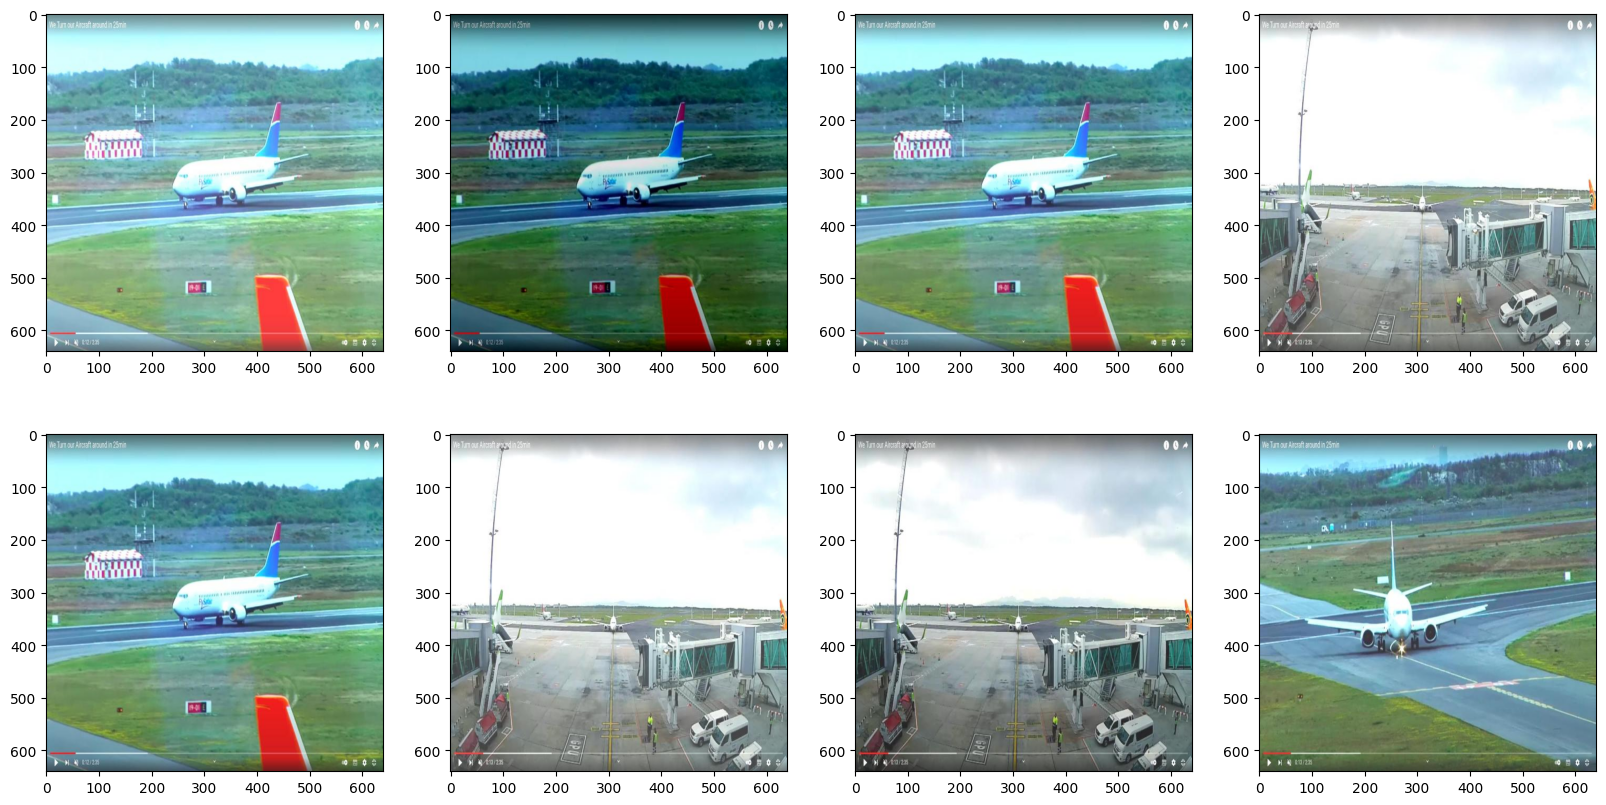

In [19]:
# read image
indx=0
images = []
IMAGE_PATH = destination_dir + "train\\images\\"

print('Sample of images in data:')
for idx, img in enumerate(os.listdir(IMAGE_PATH)):
    img = load_img(
    IMAGE_PATH + img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        indx = i*nrows+j
        axs[i,j].imshow(images[indx])

In [4]:
class_mapping = {
    "0" : "aircraft", 
    "1" : "baggage_truck", 
    "2" : "bus", 
    "3" : "fuel_truck", 
    "4" : "ground_power", 
    "5" : "person", 
    "6" : "rolling_stairway", 
    "7" : "ramp_loader", 
    "8" : "stairway", 
    "9" : "bridge_connected", 
    "10" : "catering_truck", 
    "11" : "fueling", 
    "12" : "pushback_tractor"
}

## Data Augmentation

In [21]:
import os
import random
import shutil
import tensorflow as tf

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    return image

def save_image(image, output_path):
    image = tf.cast(image, tf.uint8)
    image = tf.image.encode_jpeg(image)
    tf.io.write_file(output_path, image)

def apply_brightness_correction(image, exposure_factor):
    # Apply brightness correction using the exposure factor
    adjusted_image = tf.image.adjust_brightness(image, delta=exposure_factor)
    return adjusted_image

def add_noise_to_image(image, noise_factor):
    # Convert image to float32 before adding noise
    image = tf.cast(image, tf.float32)
    # Add Gaussian noise to the image
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=noise_factor, dtype=tf.float32)
    noisy_image = tf.clip_by_value(image + noise, 0.0, 255.0)
    return noisy_image

def adjust_contrast(image, contrast_factor):
    # Apply contrast adjustment using the contrast factor
    adjusted_image = tf.image.adjust_contrast(image, contrast_factor)
    return adjusted_image

def process_image(image_path, label_path, output_dir, exposure_factor, noise_factor, contrast_factor):
    image = load_image(image_path)
    filename = os.path.basename(image_path)
    label_filename = os.path.basename(label_path)
    label_output_path = os.path.join(output_dir, 'labels', label_filename)

    # Randomly choose whether to apply brightness correction, add noise, or adjust contrast
    choice = random.choice(['brightness', 'noise', 'contrast'])
    if choice == 'brightness':
        # Apply brightness correction to the entire image
        adjusted_image = apply_brightness_correction(image, exposure_factor)
    elif choice == 'noise':
        # Apply noise to the entire image
        adjusted_image = add_noise_to_image(image, noise_factor)
    else:
        # Adjust contrast of the entire image
        adjusted_image = adjust_contrast(image, contrast_factor)

    # Save the modified image with _aug suffix
    output_filename = f"{os.path.splitext(filename)[0]}_aug.jpg"
    output_image_path = os.path.join(output_dir, 'images', output_filename)
    save_image(adjusted_image, output_image_path)

    # Copy the corresponding YOLOv8 label text from the labels directory and rename it
    new_label_filename = f"{os.path.splitext(output_filename)[0]}.txt"
    new_label_output_path = os.path.join(output_dir, 'labels', new_label_filename)
    shutil.copy(label_path, new_label_output_path)

def process_images_in_directory(image_dir, labels_dir, output_dir, exposure_factor, noise_factor, contrast_factor, augmentation_percentage):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg')]
    num_images = len(image_paths)
    num_samples = int(num_images * augmentation_percentage)

    # Randomly select a percentage of the images
    random.seed(42)
    selected_image_paths = random.sample(image_paths, num_samples)

    num_augmented_images = 0

    for image_path in selected_image_paths:
        filename = os.path.basename(image_path)
        label_path = os.path.join(labels_dir, filename.replace('.jpg', '.txt'))
        if os.path.exists(label_path):
            process_image(image_path, label_path, output_dir, exposure_factor, noise_factor, contrast_factor)
            num_augmented_images += 1

    return num_augmented_images

# Replace the paths and parameters with the actual values
folders = ["train"]
base_dir = "C:\\Users\\sivak\\Downloads\\tst_merge\\"

exposure_factor = 0.3  # Adjust the value to control brightness correction
noise_factor = 10.0  # Adjust the value to control noise level
contrast_factor = 1.5  # Adjust the value to control contrast adjustment
augmentation_percentage = 0.5  # Percentage of selected images to augment

# Process images and labels in each dataset folder and count the number of augmented images
num_augmented_images = {}

for dataset_folder in folders:
    train_image_directory = os.path.join(base_dir, dataset_folder, 'images')
    train_labels_directory = os.path.join(base_dir, dataset_folder, 'labels')
    output_directory = os.path.join(base_dir, dataset_folder)
    
    num_augmented_images[dataset_folder] = process_images_in_directory(train_image_directory, train_labels_directory, output_directory, exposure_factor, noise_factor, contrast_factor, augmentation_percentage)

# Print the count of augmented images for each dataset folder
for dataset_folder, count in num_augmented_images.items():
    print(f"Number of augmented images in {dataset_folder} folder: {count}")


Number of augmented images in train folder: 3221


## Verify class distribution

In [5]:
def plot_pie_chart(class_counts):
    # Extract class labels and counts
    class_labels = list(class_counts.keys())
    class_counts_values = list(class_counts.values())
    
    class_labels_names = []
    for label in class_labels:
        class_labels_names.append(class_mapping[str(label)])

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(class_counts_values, labels=class_labels_names, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

    # Add a title
    plt.title('Class Distribution of the training dataset')

    # Show the pie chart
    plt.show()

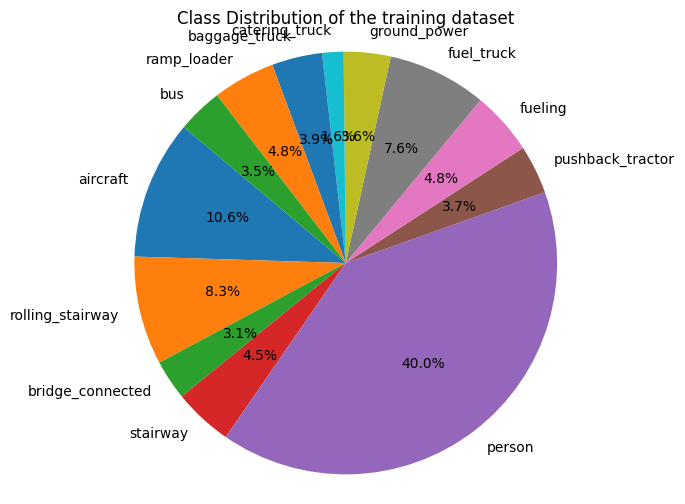

Aggregated Class Counts:
0: 5985
6: 4674
9: 1724
8: 2545
5: 22558
12: 2097
11: 2723
3: 4272
4: 2016
10: 921
1: 2175
7: 2685
2: 1954


In [6]:
def count_classes_in_yolo_labels(label_dir):
    class_counts = {}

    # List all label files in the directory
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)

        # Read the content of the label file
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            # The class label is the first element in each line
            class_label = line.strip().split()[0]

            # Increment the class count in the dictionary
            if class_label in class_counts:
                class_counts[class_label] += 1
            else:
                class_counts[class_label] = 1

    return class_counts

def count_classes_in_multiple_directories(base_dir):
    aggregated_class_counts = {}

    # List all subdirectories in the base directory
    subdirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for subdir in subdirs:
        if subdir != "train":
            continue
        subdir_path = os.path.join(base_dir, subdir, "labels")

        # Count classes in the subdirectory
        class_counts = count_classes_in_yolo_labels(subdir_path)

        # Aggregate the class counts across all subdirectories
        for class_label, count in class_counts.items():
            if class_label in aggregated_class_counts:
                aggregated_class_counts[class_label] += count
            else:
                aggregated_class_counts[class_label] = count

    return aggregated_class_counts

# dataset directory
path_to_base_directory = destination_dir
aggregated_class_counts = count_classes_in_multiple_directories(path_to_base_directory)

plot_pie_chart(aggregated_class_counts)
print("Aggregated Class Counts:")
for class_label, count in aggregated_class_counts.items():
    print(f"{class_label}: {count}")


Classes imbalance is corrected using 'Data Augmentation'. Since we are using 'Transfer Learning' with pre-trainined model, the imbalance between the two classes should not affect the results much.

In [24]:
import os

def count_images_in_folder(folder_path):
    """
    Count the number of images in a folder.

    Parameters:
        folder_path (str): The path to the folder containing images.

    Returns:
        int: The count of images in the folder.
    """
    image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".gif"]
    image_count = 0

    for file_name in os.listdir(folder_path):
        if any(file_name.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

    return image_count

folders = ["train", "test", "valid"]
images_base_dir = "C:\\Users\\sivak\\Downloads\\tst_merge\\"

for folder in folders:
    folder_path = os.path.join(images_base_dir, folder, "images")
    image_count = count_images_in_folder(folder_path)
    print(f"Number of images in {folder} folder: {image_count}")


Number of images in train folder: 9663
Number of images in test folder: 575
Number of images in valid folder: 1213


## Create Timeline chart

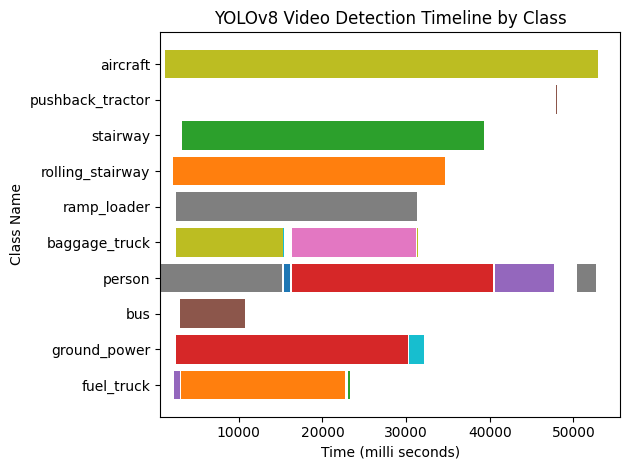

In [2]:
import re
import matplotlib.pyplot as plt
from datetime import datetime

def read_yolov8_output(output_file):
    frames = []
    with open(output_file, 'r') as file:
        lines = file.readlines()
        
        # Remove the first three lines and last two lines
        lines = lines[3:-2]
    
        for line in lines:
            match = re.search(r"video \d+/\d+ \(\d+/\d+\) .*: \d+x\d+ (.+), (\d+\.\d+)ms", line)
            if match:
                objects_str, processing_time = match.groups()
                objects = re.findall(r"\d+ (\w+)", objects_str)  # Extract class names and ignore numbers
                frames.append((objects, float(processing_time)))
    return frames

def remove_plural_s(class_name):
    if class_name != "bus" and class_name.endswith('s'):
        class_name = class_name[:-1]
    return class_name

def create_classes_timeline_chart(frames):
    if not frames:
        print("No valid frames found in the YOLOv8 output.")
        return

    classes_timeline = {}
    current_time = 0.0

    for objects, processing_time in frames:
        current_time += processing_time
        detected_categories = set(remove_plural_s(obj_class) for obj_class in objects)  # Remove 's' from class name if present

        for obj_class in classes_timeline.copy():
            if obj_class not in detected_categories:
                last_detection_time = max(classes_timeline[obj_class])
                if current_time - last_detection_time >= 20:  # Check if no detection for up to 5 seconds
                    plt.barh(obj_class, last_detection_time - min(classes_timeline[obj_class]), left=min(classes_timeline[obj_class]))
                    del classes_timeline[obj_class]

        for obj_class in detected_categories:
            if obj_class not in classes_timeline:
                classes_timeline[obj_class] = [current_time]
            else:
                classes_timeline[obj_class].append(current_time)

    #for obj_class, timestamps in classes_timeline.items():
        #plt.barh(obj_class, max(timestamps) - min(timestamps), left=min(timestamps))

    plt.xlabel('Time (milli seconds)')
    plt.ylabel('Class Name')
    plt.title('YOLOv8 Video Detection Timeline by Class')
    plt.tight_layout()
    plt.show()

yolov8_output_file = "C:\\Users\\sivak\\Downloads\\Ryanair_turnaround_logs (1).txt"
frames = read_yolov8_output(yolov8_output_file)
create_classes_timeline_chart(frames)


# Remove certain instances of Person class to correct class imbalance

We will remove some instances of person class to correct class imbalance and run Yolov8 model and observe the results

In [7]:
# This method removes all the instances of Person class if any label file has more than 3 instances of the Person class.
def remove_instances(class_name, directory_path):
    label_files = [f for f in os.listdir(directory_path) if f.endswith('.txt')]
    
    for label_file in label_files:
        with open(os.path.join(directory_path, label_file), 'r') as f:
            lines = f.readlines()

        class_instances = [line for line in lines if line.startswith(f'{class_name} ')]
        
        if len(class_instances) <= 3:
            continue
        
        instances_to_remove = len(class_instances) - 3
        updated_lines = []
        
        for line in lines:
            data = line.strip().split()
            if len(data) < 5:
                continue
            
            obj_class = int(data[0])
            if obj_class == class_name and instances_to_remove > 0:
                instances_to_remove -= 1
                continue

            updated_lines.append(line)
        
        with open(os.path.join(directory_path, label_file), 'w') as f:
            f.writelines(updated_lines)            
        
        if instances_to_remove > 0:
            print(f"Removed {instances_to_remove} instances from {label_file}")

In [8]:
# This methond counts the instances of a given class in the entire dataset folder.
def count_class_instances(label_dir, class_names):
    class_counts = 0
    
    label_files = [file for file in os.listdir(label_dir) if file.endswith('.txt')]
    
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_index = int(line.split()[0])
                if class_index == class_names:
                    class_counts += 1
    
    return class_counts

In [9]:
class_instance_to_remove = 5 # Person class
dataset_dir = "C:\\Users\\sivak\\Downloads\\experiment\\train\\labels\\"
remove_instances(class_instance_to_remove, dataset_dir)

class_instances = count_class_instances(dataset_dir, class_instance_to_remove)
print(class_instances)


7744


## Plot the new classes distribution

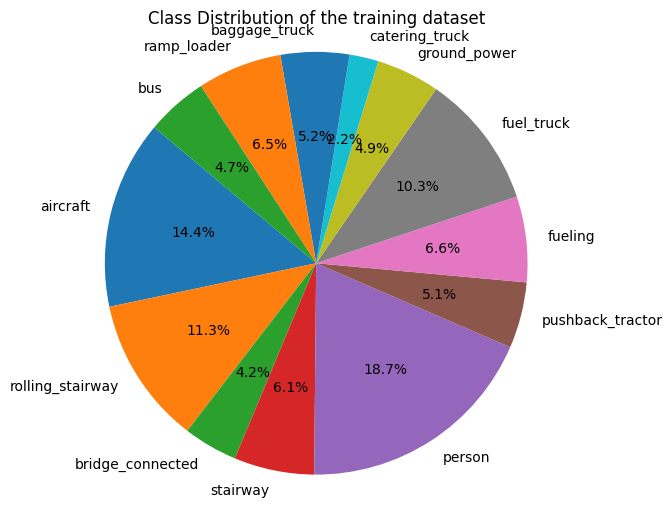

Aggregated Class Counts:
0: 5985
6: 4674
9: 1724
8: 2545
5: 7744
12: 2097
11: 2723
3: 4272
4: 2016
10: 921
1: 2175
7: 2685
2: 1954


In [11]:
path_to_base_directory = 'C:\\Users\\sivak\\Downloads\\experiment\\'
aggregated_class_counts = count_classes_in_multiple_directories(path_to_base_directory)

plot_pie_chart(aggregated_class_counts)
print("Aggregated Class Counts:")
for class_label, count in aggregated_class_counts.items():
    print(f"{class_label}: {count}")